# Numpy를 활용한 DNN 구현

## Introduction
Deep Neural Network의 기본 구조와 작동 방식에 대해 살펴보면서 이해한 과정을 코드로 구현한 레포지토리 입니다. 데이터 로드와 시각화를 제외한 모델 구현에 있어 numpy 라이브러리만 사용하였습니다.


## Implement
Task: Classification  
Preprocess: MNIST Datasets  
Architecture: 4 Fully-Connected Layers ( 784, 128, 64, 10 )  
Activation Function: ReLU, Leaky ReLU, Sigmoid, Softmax  
Loss Function: MSE, Categorical Cross Entropy  
Evaluation Metric: Accuracy, Precision, Recall  
Optimizer: Adam, SGD(Mini-batch)

## Requirements
python 3.8.16  
numpy, OmegaConf, matplotlib, tqdm  
**reqirements.txt 참조




## Load datasets & preprocess

**jupyter에서는 tensorflow에서 MNIST를 load했으므로 tensorflow의 설치가 요구됩니다.**

In [1]:
from tensorflow.keras.datasets.mnist import load_data
from omegaconf import OmegaConf
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt

### Load MNIST datasets

In [2]:
# Load MNIST datasets
train_set, test_set = load_data(path='mnist.npz')

train_data, train_labels = train_set
test_data, test_labels = test_set

In [3]:
train_data.shape, train_labels.shape

((60000, 28, 28), (60000,))

### Apply labels to one-hot encoder

In [4]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [5]:
# 원 핫 인코더
def one_hot_encoder(num_labels, labels:list):
    result = []
    for label in labels:
        one_hot = [0] * num_labels
        one_hot[label] = 1
        result.append(one_hot)
    return np.array(result)

train_labels = one_hot_encoder(10, train_labels)
test_labels = one_hot_encoder(10, test_labels)
train_labels[:10]

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

### Reshape dimensions 28 by 28 to 784

In [6]:
train_data = train_data.reshape(-1, 28*28)
test_data = test_data.reshape(-1, 28*28)
train_data[:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

### Normalize

In [7]:
# normalize
train_data = train_data / 255
test_data = test_data / 255

In [8]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

### Visualize dataset

Answer: 5


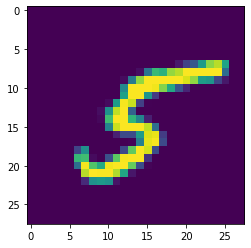

In [9]:
n = 2363
plt.imshow(train_data[n].reshape(28, 28))
print(f"Answer: {np.argmax(train_labels[n])}")

---

## Implement Fully-Connected layer model

In [10]:
# load config
config = OmegaConf.load('config.yaml')

# fix data if you need...
config.eval_metric = 'f1_score'
config.epoch = 10

# show details
print(f"Config details:\n{'='*20}\n\n{OmegaConf.to_yaml(config)}{'='*20}", end="\n\n")

Config details:

activation_fn:
- leaky_relu
- softmax
batch_size: 128
epoch: 10
eval_metric: f1_score
init_fn: he_normal
loss_fn: categorical_cross_entropy
model:
- 784
- 128
- 64
- 10
optim: Adam
optim_args:
  epsilon: 1.0e-08
  lr: 0.001
seed: 1234
shuffle: true
val_size: 0.1



Config details:

activation_fn:
- leaky_relu
- softmax
batch_size: 128
epoch: 10
eval_metric: f1_score
init_fn: he_normal
loss_fn: categorical_cross_entropy
model:
- 784
- 128
- 64
- 10
optim: Adam
optim_args:
  epsilon: 1.0e-08
  lr: 0.001
seed: 1234
shuffle: true
val_size: 0.1



  0%|          | 0/421 [00:00<?, ?it/s]

001 Epoch | train_loss: 1.323524 | val_loss: 1.100757 | val_score: 0.964366


  0%|          | 0/421 [00:00<?, ?it/s]

002 Epoch | train_loss: 0.867951 | val_loss: 0.793477 | val_score: 0.970201


  0%|          | 0/421 [00:00<?, ?it/s]

003 Epoch | train_loss: 0.647986 | val_loss: 0.657140 | val_score: 0.973631


  0%|          | 0/421 [00:00<?, ?it/s]

004 Epoch | train_loss: 0.501534 | val_loss: 0.568275 | val_score: 0.976416


  0%|          | 0/421 [00:00<?, ?it/s]

005 Epoch | train_loss: 0.396888 | val_loss: 0.511635 | val_score: 0.977932


  0%|          | 0/421 [00:00<?, ?it/s]

006 Epoch | train_loss: 0.311482 | val_loss: 0.474995 | val_score: 0.978269


  0%|          | 0/421 [00:00<?, ?it/s]

007 Epoch | train_loss: 0.278669 | val_loss: 0.467921 | val_score: 0.977695


  0%|          | 0/421 [00:00<?, ?it/s]

008 Epoch | train_loss: 0.261157 | val_loss: 0.474305 | val_score: 0.976674


  0%|          | 0/421 [00:00<?, ?it/s]

009 Epoch | train_loss: 0.240638 | val_loss: 0.469799 | val_score: 0.976566


  0%|          | 0/421 [00:00<?, ?it/s]

010 Epoch | train_loss: 0.189424 | val_loss: 0.449831 | val_score: 0.975442


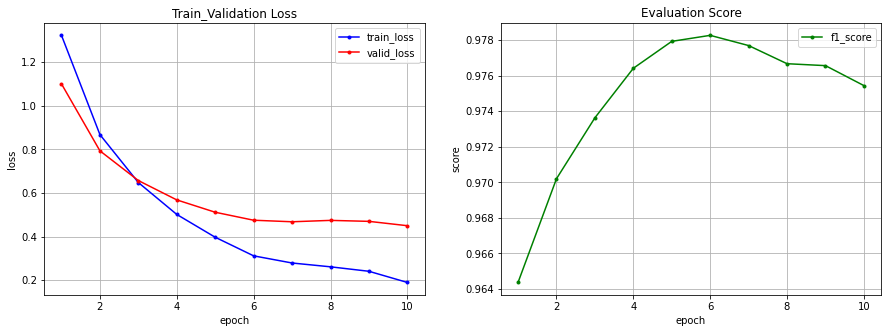

In [14]:
from tensorflow.keras.datasets.mnist import load_data
from omegaconf import OmegaConf
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np

# DataLoader
def shuffle_data(X, Y):
    """Data와 Label을 concat 후 shuffle -> Data, Label 분리
    """
    
    concat = np.concatenate((X, Y), axis=1)
    np.random.shuffle(concat)

    X = concat[:, :-Y.shape[1]]
    Y = concat[:, -Y.shape[1]:]

    return X, Y


def one_hot_encoder(num_labels, labels:list):
    """One_hot_encoder
    """
    
    result = []
    for label in labels:
        one_hot = [0] * num_labels
        one_hot[label] = 1
        result.append(one_hot)
    return np.array(result)


def train_validation_split(X, Y, val_size, seed=None, shuffle=False):
    """train_validation_split
    
    batch단위 split에서 데이터 셔플링을 진행하므로
    train_val_split 단계에서는 suffle=False를 Default로 설정
    """
    
    np.random.seed(seed)
    
    if shuffle:
        X, Y = shuffle_data(X, Y)
    
    boundary = int(X.shape[0] * (1-val_size))

    X_train = X[:boundary]
    Y_train = Y[:boundary]
    X_val = X[boundary:]
    Y_val = Y[boundary:]
    
    return X_train, Y_train, X_val, Y_val


def split_into_batches(X, Y, batch_size, drop=True, seed=None, shuffle=True):
    """batch size 단위로 데이터를 reshape합니다.
    """
    
    np.random.seed(seed)
    
    if shuffle:
        X, Y = shuffle_data(X, Y)
    
    # batch_size가 딱 맞아 떨어지지 않을 경우
    if X.shape[0] % batch_size != 0:
        if drop: # 나머지 뒷단의 데이터를 버린다.
            num_to_select = X.shape[0] // batch_size * batch_size # 맞아떨어지는 개수
            X, Y = X[:num_to_select], Y[:num_to_select]
            
        else: # 데이터를 추가한다.(랜덤 추출해서)
            num_to_fill = (X.shape[0] // batch_size + 1) * batch_size - X.shape[0] # 추가로 필요한 개수
            indices_to_add = np.random.choice(range(0, X.shape[0]+1), num_to_fill, replace=False) # 추가할 인덱스 랜덤 선정
            X_to_add, Y_to_add = X[indices_to_add], Y[indices_to_add] # 추가할 데이터셋
            X, Y = np.concatenate((X, X_to_add)), np.concatenate((Y, Y_to_add)) # 기존 데이터에 추가
    
    X_batch_datasets = X.reshape(-1, batch_size, X.shape[-1]) # reshape (iter, bs, data)
    Y_batch_datasets = Y.reshape(-1, batch_size, Y.shape[-1]) # reshape (iter, bs, labels)
    
    return X_batch_datasets, Y_batch_datasets


# Fully-Connected Model Archetecture
class Initializers:
    """Initializers
    
    Initializer list:
        xavier_normal
        he_normal
        uniform
    """
    
    def __init__(self, fn_name='xavier_normal'):
        self.func = getattr(self, fn_name)

    
    def __str__(self):
        return f"Initialization Function: {self.func.__name__}"

    
    def initialize(self, model, seed=None):
        """initialize weights & biases
        """
        
        np.random.seed(seed)
        parameters = dict()
        layers = len(model)
        
        for L in range(1, layers): # 1, 2, 3        
            weights, biases = self.func(model[L-1], model[L]) # weights & biases
            parameters["W" + str(L)] = weights
            parameters["b" + str(L)] = biases

        return parameters

    # randn은 기본적으로 N(0, 1)이지만 분포를 변경하고 싶다면 E + STD * randn을 하면 된다.
    def xavier_normal(self, input_n_neurons, output_n_neurons):
        """Xavier_initializer
        """

        weights = np.random.randn(input_n_neurons, output_n_neurons) * np.sqrt(1 / input_n_neurons)
        biases = np.zeros(output_n_neurons)
        
        return (weights, biases)

    def he_normal(self, input_n_neurons, output_n_neurons):
        """HE initializer
        """

        weights = np.random.randn(input_n_neurons, output_n_neurons) * np.sqrt(2/input_n_neurons)
        biases = np.zeros(output_n_neurons)

        return (weights, biases)

    def uniform(self, input_n_neurons, output_n_neurons):
        """Uniform initializer
        """

        weights = np.random.uniform(-np.sqrt(6/input_n_neurons), np.sqrt(6/input_n_neurons), size=(input_n_neurons, output_n_neurons))
        biases = np.zeros(output_n_neurons)

        return (weights, biases)


class ActivationFunction:
    """Activation Function
    
    Activation list:
        leaky_relu
        relu
        sigmoid
        softmax
    """
    
    def __init__(self, fn_name:str, derivative=False):
        self.func = getattr(self, fn_name)
        self.derivative = derivative
        
    def __call__(self, *args):        
        return self.func(*args)    

    def __str__(self):
        return f"Activation Function: {self.func.__name__}"

    
    def sigmoid(self, x):
        """Sigmoid
        """
        
        if self.derivative():
            return (np.exp(-x))/((np.exp(-x)+1)**2)
        
        return 1/(1 + np.exp(-x))
    
    def relu(self, x):
        """ReLU
        """
        
        if self.derivative():
            def f(x):
                return 0 if x < 0 else 1
            f = np.vectorize(f)
            return f(x)
        
        return np.maximum(0, x)

    def leaky_relu(self, x):
        """Leaky_ReLU
        """
        
        if self.derivative:
            def f(x):
                return 0.01 if x < 0 else 1
            f = np.vectorize(f)
            return f(x)
            
        return np.maximum(0.01*x, x)

    def softmax(self, x):
        """Softmax
        
        derivative_softmax의 경우 input으로 tuple(prediction, Y)을 받아야 한다.
        """
        
        if self.derivative: # Softmax에 대한 Cross Entropy 함수 미분
            prediction, Y = x # input으로 tuple(prediction, Y)을 받아야 한다.
            return prediction - Y 
        
        def f(x): # np.max는 overflow 방지용
            return np.exp(x-np.max(x)) / np.sum(np.exp(x-np.max(x)))


        if np.ndim(x) == 1: # 배치 묶음이 아닐 경우 인위적으로 1 배치 생성
            x = np.expand_dims(x, axis=0)
            return np.array([f(z) for z in x]).squeeze() # 배치 차원 제거

        return np.array([f(z) for z in x])

    # softmax의 도함수(사용 보류)
    def derivative_softmax_with_loss(self, x):
        """Softmax(z)에서 z에 대한 미분

        야코비안 행렬 출력
        : 미분 결과가 야코비안 행렬이 될 경우 next step에서의 연산을 위한
        reshape를 어떤 방식으로 해야할지 모르겠다.
        """

        results = []
        for pred in x: # x = softmax(z)를 의미함

            pred_len = pred.shape[-1] # a와 z는 길이가 같다.
            single_result = np.zeros((pred_len, pred_len))

            for i in range(pred_len):
                for j in range(pred_len):

                    '''
                    if i == j:
                        single_result[i][j] = pred[j] * (1-pred[j])
                    else:
                        single_result[i][j] = -pred[i] * pred[j]
                    '''

                    delta = 1 if i == j else 0
                    single_result[i][j] = pred[i] * (delta - pred[j]) if i==j else 0

            results.append(single_result)

        return np.array(results)
    
class LossFunction:
    """Loss Function
    
    Function list:
        mse
        categorical_cross_entropy
    """
    
    def __init__(self, fn_name:str):
        self.func = getattr(self, fn_name)
    
    def __call__(self, *args):
        return self.func(*args)    

    def __str__(self):
        return f"Loss Function: {self.func.__name__}"
        

    def mse(self, val_X, val_Y, parameters, activation_fn):
        """MSE
        """

        prediction, _ = feed_forward(val_X, parameters, activation_fn)
        # (x-y)^2의 평균으로 각 row의 loss를 구한 뒤 batch_size 단위의 평균 loss 연산 
        return np.mean((prediction - val_Y) ** 2) / 2 # 미분의 편의를 위해 /2 수행

    def categorical_cross_entropy(self, val_X, val_Y, parameters, activation_fn):
        """Catgorical Cross Entoropy
        """

        prediction, _ = feed_forward(val_X, parameters, activation_fn)
        return np.mean(-np.sum(prediction * np.log(val_Y+1e-7), axis=1))


class Evaluation:
    """Evaluation
    """

    def __init__(self, fn_name:str):
        self.func = getattr(self, fn_name)
  
    def __call__(self, prediction_indices, target_indices):
        return self.func(prediction_indices, target_indices)    

    def __str__(self):
        return f"Evaluation Metric: {self.func.__name__}"
    
    
    def accuracy(self, prediction_indices, target_indices):
        """Accuracy
        """

        return np.mean(prediction_indices == target_indices)
    
    def precision(self, prediction_indices, target_indices):
        """Precision
        """
        
        # precision
        labels = np.unique(prediction_indices)
        score_by_label = np.zeros((len(labels)))
        
        for i in labels:
            TPFP_indices = np.nonzero(prediction_indices == i) # i로 예측한 값의 위치
            TPFP = TPFP_indices[0].shape[0] # i로 예측한 값의 개수

            TP_all = prediction_indices==target_indices # 예상과 정답이 일치하는 수
            TP = np.sum(TP_all[TPFP_indices]) # TP_all 중 i값이 True 경우의 합

            score_by_label[i] = TP / TPFP
        score = np.mean(score_by_label)
        
        return score, score_by_label
    
    def recall(self, prediction_indices, target_indices):
        """Recall
        """
        
        # recall
        labels = np.unique(target_indices)
        score_by_label = np.zeros((len(labels)))
        
        for i in labels:
            TPFN_indices = np.nonzero(target_indices == i) # i가 정답인 값의 위치
            TPFN = TPFN_indices[0].shape[0]# 정답이 i인 값의 개수

            TP_all = prediction_indices==target_indices # 예상과 정답이 일치하는 수
            TP = np.sum(TP_all[TPFN_indices]) # TP_all 중 i값이 True 경우의 합

            score_by_label[i] = TP / TPFN
        score = np.mean(score_by_label)
        
        return score, score_by_label
        
    def f1_score(self, prediction_indices, target_indices):
        """F1 score
        """
        
        precision_score, _ = self.precision(prediction_indices, target_indices)
        recall_score, _ = self.recall(prediction_indices, target_indices)
        
        return 2 / (1 / precision_score + 1 / recall_score)



# Adam optimizer
class Optimizers:
    """Optimizers
    
    Function list:
        SGD
        Adam
    """
    
    def __init__(self, fn_name:str='Adam'):
        self.func = getattr(self, fn_name)
    
    def __call__(self, **kwargs):
        return self.func(**kwargs)

    def __str__(self):
        return f"Optimizer Function: {self.func.__name__}"
    
        
    class Adam:
        """Adam optimization algorithm
        """

        def __init__(self, lr=0.001, betas=(0.9, 0.999), epsilon=1e-08):

            self.t = 0
            self.lr = lr
            self.beta1 = betas[0]
            self.beta2 = betas[1]
            self.epsilon = epsilon
            self.m = None
            self.v = None


        def update(self, parameters, gradients):
            """Update Parameters with Adam
            """
            
            if self.m == None:
                self.m = {key: np.zeros_like(value) for key, value in gradients.items()}
                self.v = {key: np.zeros_like(value) for key, value in gradients.items()}
            
            self.t += 1
            
            layers = len(parameters) // 2 # num of parameter layers
            for L in range(1, layers+1):

                gW = gradients["dW" + str(L)]
                gb = gradients["db" + str(L)]
                mW_prev = self.m["dW" + str(L)]
                mb_prev = self.m["db" + str(L)]
                vW_prev = self.v["dW" + str(L)]
                vb_prev = self.v["db" + str(L)]

                
                mW = self.beta1 * mW_prev + (1-self.beta1) * gW
                mb = self.beta1 * mb_prev + (1-self.beta1) * gb
                mW_hat = mW / (1 - self.beta1 ** self.t)
                mb_hat = mb / (1 - self.beta1 ** self.t)

                vW = (self.beta2 * vW_prev + (1-self.beta2) * np.power(gW, 2))
                vb = (self.beta2 * vb_prev + (1-self.beta2) * np.power(gb, 2))
                vW_hat = vW / (1 - self.beta2 ** self.t)
                vb_hat = vb / (1 - self.beta2 ** self.t)

                # update
                self.m["dW" + str(L)] = mW
                self.m["db" + str(L)] = mb
                self.v["dW" + str(L)] = vW
                self.v["db" + str(L)] = vb
                parameters["W" + str(L)] -= self.lr * mW_hat / (np.sqrt(vW_hat) + self.epsilon)
                parameters["b" + str(L)] -= self.lr * mb_hat / (np.sqrt(vb_hat) + self.epsilon)

            return parameters


    # SGD(mini-batch) optimizer  
    class SGD:
        """Stochastic Gradient Descent (mini-batch)
        """

        def __init__(self, lr):
            self.lr = lr

        def update(self, parameters, gradients):
            """Update Parameters with SGD
            """
            layers = len(parameters) // 2

            for L in range(1, layers+1):
                parameters["W" + str(L)] -= self.lr * gradients["dW" + str(L)]
                parameters["b" + str(L)] -= self.lr * gradients["db" + str(L)]

            return parameters


def feed_forward(X, parameters, activation_fn): # 
    """Feed forward
    
    미니 배치를 대상으로 피드 포워드를 진행한다.
    """
    a_func = ActivationFunction(activation_fn[0])
    a_func_last = ActivationFunction(activation_fn[1])
    
    cache = {"a0": X}
    layers = len(parameters) // 2
    for L in range(1, layers+1): # 1, 2, 3
    
        prev_a = cache["a" + str(L-1)]
        W = parameters["W" + str(L)]
        b = parameters["b" + str(L)]

        Z = np.matmul(prev_a, W) + b
        
        if L == layers: # 마지막 레이어에서 softmax
            a = a_func_last(Z)
        else:
            a = a_func(Z)

        cache["Z" + str(L)] = Z
        cache["a" + str(L)] = a
    
    return a, cache


def back_prop(prediction, Y, cache, parameters, activation_fn, loss_fn):
    """Back Propagation
    
    미니배치 단위로 피드포워드한 결과를 대상으로 backward 연산을 진행한다.
    """

    d_a_func = ActivationFunction(activation_fn[0], derivative=True)
    d_a_func_last = ActivationFunction(activation_fn[1], derivative=True)
    
    gradients = {}
    layers = len(parameters) // 2
    
    for L in range(layers, 0, -1):
        
        Z = cache["Z" + str(L)] # (bs, 10)
        W = parameters["W" + str(L)]
        a = cache["a" + str(L)]
        a_prev = cache["a" + str(L-1)]
        
        # 마지막 layer에서 activation에 대한 미분
        if L == layers:
            # Softmax에 대한 Cross Entropy 함수 미분
            if activation_fn[1] == 'softmax' and loss_fn == 'categorical_cross_entropy':
                a = prediction, Y
                dZ = d_a_func_last(a) # (bs, 10)
            
            # sigmoid에 대한 z 미분
            elif activation_fn[1] == 'sigmoid' and loss_fn == 'mse':
                da = (prediction - Y) / prediction.shape[-1] # MSE에서 a에 대한 도함수 dE/da, (bs, 10)
                dZ = da * d_a_func_last(Z)
            
            else:
                raise Exception(
                    "You have to choose softmax-categorical_cross_entropy pair \
or sigmoid-mse pair only"
                )
            
        else: # leaky_relu 미분
            dZ = da * d_a_func(Z) # (bs, 10)의 곱
            
        dW = np.einsum("ba,bz->baz", a_prev, dZ) # (bs, 64)와 (bs, 10)의 외적 -> (bs, 64, 10)
        db = dZ * 1 # dZ랑 같음
        da = np.einsum("bz,wz->bw", dZ, W) # (bs, 10)과 (64, 10)의 내적 -> (bs, 64)
        
        # 배치별 기울기값에 대한 평균값을 추가한다.
        gradients["dW" + str(L)] = np.mean(dW, axis=0)
        gradients["db" + str(L)] = np.mean(db, axis=0)
    
    return gradients


def compute_loss(val_X, val_Y, parameters, activation_fn, loss_fn):
    """MSE
    
    미니 배치 단위 평균 loss를 구한다.
    """
    l_func = LossFunction(loss_fn)
    
    return l_func(val_X, val_Y, parameters, activation_fn)


def compute_evaluation(val_X, val_Y, parameters, activation_fn, eval_metric):
    """Compute Evaluation
    """
    
    # get prediction indices and target indices
    prediction, _ = feed_forward(val_X, parameters, activation_fn)
    prediction_indices = np.argmax(prediction, axis=1)
    target_indices = np.argmax(val_Y, axis=1)
    
    # evaluate
    evaluation_result = {eval_metric: {}}
    evaluation_metric = Evaluation(eval_metric)
    calc_result = evaluation_metric(prediction_indices, target_indices)

    if isinstance(calc_result, np.float64):
        evaluation_result[eval_metric]['score'] = calc_result

    else:
        evaluation_result[eval_metric]['score'] = calc_result[0]
        evaluation_result[eval_metric]['score_by_label'] = calc_result[1]
        
    
    return evaluation_result
    

def train(datasets, labels, model, val_size, epoch, batch_size, seed, shuffle, init_fn, activation_fn:list, loss_fn, optim, optim_args, eval_metric):
    """Train & validation
    """
    
    # init parameters
    initializers = Initializers(init_fn)
    parameters = initializers.initialize(model, seed=seed)
    optimizer = Optimizers(optim)(**optim_args)
    
    # train validation split
    train_X, train_Y, val_X, val_Y = train_validation_split(datasets, labels, val_size)
    
    # crawling loss and evaluation
    train_loss_list = []
    validation_loss_list = []
    evaluation_list = []
    best_eval_score = 0.0
    for i in range(epoch):
        
        # split train data by batch size
        train_X_datasets, train_Y_datasets = split_into_batches(train_X, train_Y, batch_size=batch_size, drop=True, seed=seed, shuffle=shuffle)
        
        # train iteration
        for batches_X, batches_Y in zip(tqdm(train_X_datasets, leave=False), train_Y_datasets):
            
            # forward
            prediction, cache = feed_forward(batches_X, parameters, activation_fn)
            # backward
            gradients = back_prop(prediction, batches_Y, cache, parameters, activation_fn, loss_fn)
            # update
            parameters = optimizer.update(parameters, gradients)
        
        # validate per epoch
        # train_loss check
        train_loss_list.append(compute_loss(train_X, train_Y, parameters, activation_fn, loss_fn)) # 예측연산이 내장되어 있음
        # validation loss check
        validation_loss_list.append(compute_loss(val_X, val_Y, parameters, activation_fn, loss_fn))
        # evaluation
        eval_result = compute_evaluation(val_X, val_Y, parameters, activation_fn, eval_metric)
        evaluation_list.append(eval_result)
    
        
        # update best eval score
        curr_eval_score = eval_result[eval_metric]['score']
        best_eval_score = curr_eval_score if curr_eval_score > best_eval_score else best_eval_score
        
        
        # verbose
        print(
            f"{str(i+1).zfill(3)} Epoch | \
train_loss: {train_loss_list[-1]:.6f} | \
val_loss: {validation_loss_list[-1]:.6f} | \
val_score: {evaluation_list[-1][eval_metric]['score']:.6f}"
        )

    
    history = {
        "train_loss": train_loss_list, 
        "valid_loss": validation_loss_list, 
        "evaluation": evaluation_list,
        "best_score": best_eval_score
    }
    
    return history, parameters


def predict(datasets, model, parameters, activation_fn):
    """Prediction
    """
    
    prediction, _ = feed_forward(datasets, parameters, activation_fn)
    prediction_indices = np.argmax(prediction, axis=1).tolist()
    
    return prediction_indices




# Load MNIST datasets
train_set, test_set = load_data(path='mnist.npz')
train_data, train_labels = train_set
test_data, test_labels = test_set

# One-hot encoder
train_labels = one_hot_encoder(10, train_labels)
test_labels = one_hot_encoder(10, test_labels)

# Reshape 28 by 28 to 784
train_data = train_data.reshape(-1, 28*28)
test_data = test_data.reshape(-1, 28*28)

# normalize
train_data = train_data / 255
test_data = test_data / 255

# show details
print(f"Config details:\n{'='*20}\n\n{OmegaConf.to_yaml(config)}{'='*20}", end="\n\n")

# train (5,000 data)
history, parameters = train(train_data, train_labels, **config)

# prediction
prediction = predict(test_data, config.model, parameters, config.activation_fn)


# Visualize

# loss
train_loss = history['train_loss']
valid_loss = history['valid_loss']

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
x_len = np.arange(1, len(train_loss)+1)
plt.plot(x_len, train_loss, marker='.', c='blue', label="train_loss")
plt.plot(x_len, valid_loss, marker='.', c='red', label="valid_loss")

plt.title('Train_Validation Loss')
plt.legend() # loc='upper right'
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

# evaluation
metric = ''.join(history['evaluation'][0].keys())
score = [history['evaluation'][i][metric]['score'] for i in range(len(history['evaluation']))]

plt.subplot(1, 2, 2)
plt.plot(x_len, score, marker='.', c='green', label=metric)

plt.title('Evaluation Score')
plt.legend() # loc='upper right'
plt.grid()
plt.xlabel('epoch')
plt.ylabel('score')
plt.show()


---